# Check Labels (YOLO)



**Montrer un échantillon d’images pour chaque classe avec les boîtes englobantes**

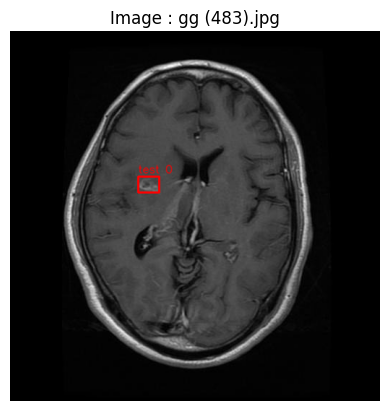

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

image_folder = "../data/part_two_data/Train/Glioma/images"
label_folder = "../data/part_two_data/Train/Glioma/labels"

images = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

if not images:
    print(" Aucune image trouvée dans ce dossier.")
else:
    img_name = random.choice(images)
    img_path = os.path.join(image_folder, img_name)

    label_path = os.path.join(label_folder, os.path.splitext(img_name)[0] + ".txt")

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                class_id, x_center, y_center, bw, bh = map(float, line.strip().split())

                x1 = int((x_center - bw / 2) * w)
                y1 = int((y_center - bh / 2) * h)
                x2 = int((x_center + bw / 2) * w)
                y2 = int((y_center + bh / 2) * h)

                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, f"test {int(class_id)}", (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    else:
        print(f" Aucun fichier label trouvé pour {img_name}")

    plt.imshow(image)
    plt.title(f"Image : {img_name}")
    plt.axis("off")
    plt.show()



C:\Users\oussa\AppData\Local\Temp\ipykernel_35592\2036838412.py:55: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


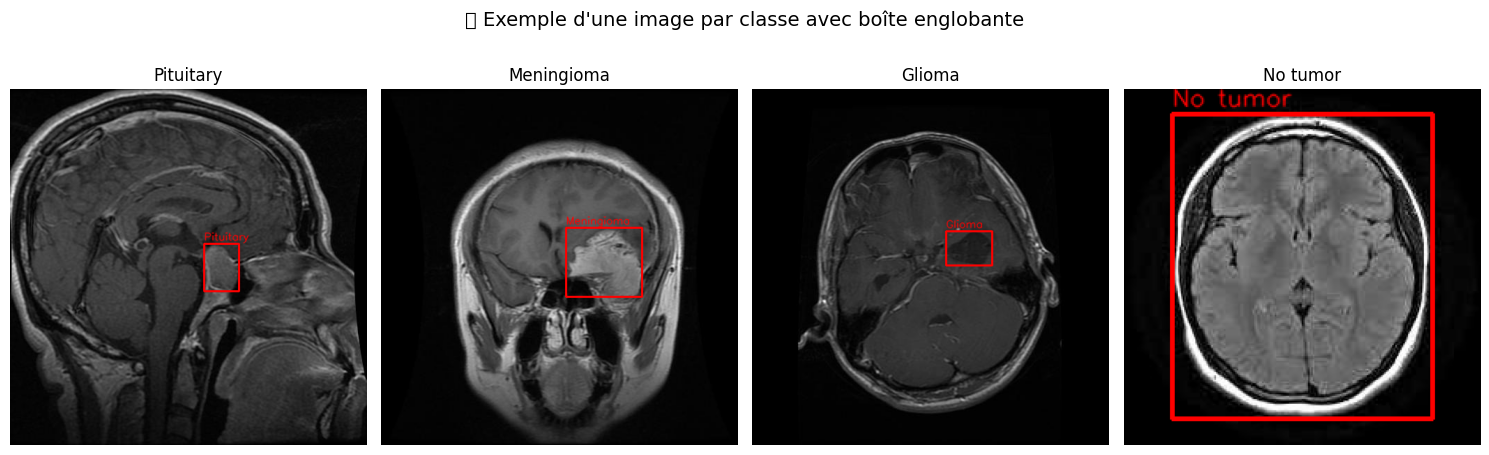

In [26]:
import os
import random
import matplotlib.pyplot as plt
import cv2

base_path = "../data/part_two_data/Train"

classes = ["Pituitary", "Meningioma", "Glioma", "No tumor"]

fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
fig.suptitle("🧠 Exemple d'une image par classe avec boîte englobante", fontsize=14)

for i, cls in enumerate(classes):
    img_dir = os.path.join(base_path, cls, "images")
    lbl_dir = os.path.join(base_path, cls, "labels")

    if not os.path.exists(img_dir):
        print(f"Dossier introuvable : {img_dir}")
        continue

    images = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
    if not images:
        print(f"⚠️ Aucune image dans {img_dir}")
        continue

    img_name = random.choice(images)
    img_path = os.path.join(img_dir, img_name)
    lbl_path = os.path.join(lbl_dir, os.path.splitext(img_name)[0] + ".txt")

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    if os.path.exists(lbl_path):
        with open(lbl_path, "r") as f:
            for line in f:
                class_id, x_center, y_center, bw, bh = map(float, line.strip().split())

                x1 = int((x_center - bw / 2) * w)
                y1 = int((y_center - bh / 2) * h)
                x2 = int((x_center + bw / 2) * w)
                y2 = int((y_center + bh / 2) * h)

                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, f"{cls}", (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    else:
        print(f"⚠️ Aucun label trouvé pour {img_name}")

    ax = axes[i]
    ax.imshow(image)
    ax.set_title(cls)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil

base_path = "../data/part_two_data"
sets = ["train", "val"]
classes = ["Pituitary", "Meningioma", "Glioma", "No Tumor"]

output_path = os.path.join(base_path, "output")
os.makedirs(output_path, exist_ok=True)

for dataset in sets:  
    print(f"\n Traitement du dossier : {dataset}")

    for cls in classes:
        img_folder = os.path.join(base_path, dataset, cls, "images")
        lbl_folder = os.path.join(base_path, dataset, cls, "labels")

        if not os.path.exists(img_folder) or not os.path.exists(lbl_folder):
            print(f" Dossier manquant pour la classe {cls} dans {dataset}")
            continue

        out_img_dir = os.path.join(output_path, "images", dataset)
        out_lbl_dir = os.path.join(output_path, "labels", dataset)
        os.makedirs(out_img_dir, exist_ok=True)
        os.makedirs(out_lbl_dir, exist_ok=True)

        for img_name in os.listdir(img_folder):
            if not img_name.lower().endswith((".jpg", ".png", ".jpeg")):
                continue

            img_path = os.path.join(img_folder, img_name)
            label_name = os.path.splitext(img_name)[0] + ".txt"
            label_path = os.path.join(lbl_folder, label_name)

            if os.path.exists(label_path):
                shutil.copy(img_path, os.path.join(out_img_dir, img_name))
                shutil.copy(label_path, os.path.join(out_lbl_dir, label_name))
            else:
                print(f" Pas de label pour {img_name} ({cls}/{dataset}), ignorée.")

print("\n Filtrage terminé : seules les images avec labels ont été copiées.")



📂 Traitement du dossier : train

📂 Traitement du dossier : val
⚠️ Pas de label pour image(55).jpg (No Tumor/val), ignorée.
⚠️ Pas de label pour image(61).jpg (No Tumor/val), ignorée.

✅ Filtrage terminé : seules les images avec labels ont été copiées.
